<a href="https://colab.research.google.com/github/B-MEbrahim/DL/blob/main/Newswires/newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters

In [6]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [4]:
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [7]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [10]:
from tensorflow.keras import layers
from tensorflow import keras

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
X_val = X_train[:1000]
X_train_par = X_train[1000:]
y_val = y_train[:1000]
y_train_par = y_train[1000:]

In [20]:
history = model.fit(X_train_par, y_train_par,
                    epochs=9,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9634 - loss: 0.1214 - val_accuracy: 0.8150 - val_loss: 0.9507
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9593 - loss: 0.1176 - val_accuracy: 0.8220 - val_loss: 0.9425
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9630 - loss: 0.1080 - val_accuracy: 0.8090 - val_loss: 1.0035
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9612 - loss: 0.1140 - val_accuracy: 0.8160 - val_loss: 1.0335
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9620 - loss: 0.1092 - val_accuracy: 0.8030 - val_loss: 1.0239
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9641 - loss: 0.1068 - val_accuracy: 0.8190 - val_loss: 0.9695
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.9617 - loss: 0.1044 - val_accuracy: 0.8060 - val_loss: 1.0331
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.9612 - loss: 0.1022 - val_accuracy: 0.8070 - val_loss:

In [17]:
import matplotlib.pyplot as plt

def plot_history(history, loss_func):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_title("Loss")
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel(loss_func)
  ax1.legend()
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_title("Accuracy")
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax2.legend()
  plt.show()

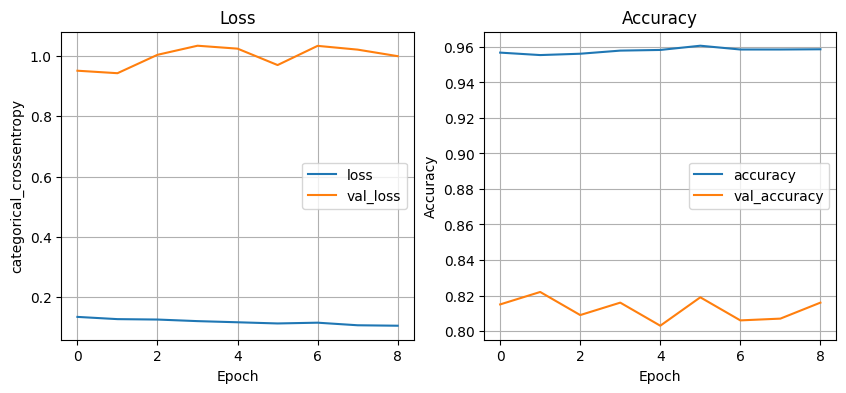

In [21]:
plot_history(history, 'categorical_crossentropy')